# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 12

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
325,Darlow,Newcastle Utd,50,10.952381,46,49.939488,4.2,4.559692,3.638789,4.263965,2.039156
12,Martínez,Aston Villa,48,10.000000,53,44.121492,5.3,4.412149,4.141603,4.575737,2.013861
96,Pope,Burnley,54,10.000000,53,46.598499,5.3,4.659850,6.117111,4.662464,2.005280
431,Fabianski,West Ham,51,12.083333,58,54.119165,4.8,4.478827,5.685122,4.414524,1.983258
383,Lloris,Tottenham,56,11.914894,56,51.864494,4.7,4.352913,5.232927,4.156616,1.839441
363,McCarthy,Southampton,46,11.904762,50,43.529866,4.2,3.656509,4.329611,3.500609,1.704856
417,Johnstone,West Brom,45,11.944444,43,42.638699,3.6,3.569752,3.874958,3.325928,1.682797
217,Schmeichel,Leicester City,55,11.951220,49,46.810940,4.1,3.916834,4.145940,3.913496,1.670144
8,Leno,Arsenal,50,11.944444,43,44.350591,3.6,3.713073,3.805665,3.748845,1.660537


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
470,Kilman,Wolves,43,7.021277,33,30.579714,4.7,4.355293,2.430265,4.244594,2.100309
277,Cancelo,Manchester City,55,6.981132,37,33.939824,5.3,4.861651,4.379792,4.947580,2.073015
389,Aurier,Tottenham,52,5.964912,34,27.320664,5.7,4.580229,3.741829,4.505166,2.008563
232,Chilwell,Chelsea,62,8.955224,60,44.202706,6.7,4.935969,5.496238,4.849839,1.982333
123,James,Chelsea,53,11.041667,53,50.172289,4.8,4.543905,5.360832,4.468024,1.973746
273,Stones,Manchester City,48,4.000000,22,16.894069,5.5,4.223517,5.442574,4.304239,1.927763
461,Saïss,Wolves,51,7.017544,40,30.496665,5.7,4.345775,4.531484,4.219692,1.924341
563,Ait Nouri,Wolves,50,4.000000,20,17.000099,5.0,4.250025,2.663598,4.127624,1.900669
558,Coufal,West Ham,46,9.000000,36,34.083642,4.0,3.787071,3.865122,3.660948,1.765731


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
105,Jorginho,Chelsea,49,6.981132,37,34.720973,5.3,4.973545,1.000000,4.814556,2.246818
141,Zaha,Crystal Palace,75,10.000000,74,60.933460,7.4,6.093346,5.986058,6.203494,2.224975
254,Salah,Liverpool,123,11.046512,95,80.492210,8.6,7.286663,7.756663,7.428801,2.077668
37,Grealish,Aston Villa,78,10.000000,73,57.151234,7.3,5.715123,4.437135,5.835826,2.046342
272,De Bruyne,Manchester City,118,10.000000,56,69.777154,5.6,6.977715,8.712051,7.042076,2.031291
302,Fernandes,Manchester Utd,109,11.066667,83,73.907259,7.5,6.678367,8.287832,6.989544,2.022819
390,Son,Tottenham,96,11.931818,105,72.385665,8.8,6.066608,4.978521,6.326179,1.957989
40,Trézéguet,Aston Villa,53,8.928571,25,39.660953,2.8,4.442027,5.496803,4.552148,1.929493
275,Mahrez,Manchester City,84,8.965517,52,47.537223,5.8,5.302229,6.988379,5.348289,1.829443


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,62,12.096774,75,71.935430,6.2,5.946662,5.955695,6.060249,2.388237
506,Wilson,Newcastle Utd,66,10.000000,68,59.395430,6.8,5.939543,3.830040,6.183595,2.311964
388,Kane,Tottenham,109,12.022472,107,88.624768,8.9,7.371593,5.488174,7.793087,2.232791
224,Vardy,Leicester City,103,11.012658,87,76.312384,7.9,6.929515,6.069414,6.748049,2.159157
514,Watkins,Aston Villa,61,10.000000,51,52.418477,5.1,5.241848,4.975000,5.335034,2.122362
377,Adams,Southampton,60,12.000000,60,57.213907,5.0,4.767826,4.723581,4.804504,1.946457
164,Calvert-Lewin,Everton,79,12.028986,83,65.656954,6.9,5.458229,4.987083,5.422107,1.941951
366,Ings,Southampton,84,8.955224,60,48.875430,6.7,5.457756,6.989238,5.501460,1.883105
588,Welbeck,Brighton,55,6.000000,24,25.056954,4.0,4.176159,4.822617,4.292338,1.780720


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
388,Kane,Tottenham,109,12.022472,107,88.624768,8.9,7.371593,7.793087,2.232791
254,Salah,Liverpool,123,11.046512,95,80.492210,8.6,7.286663,7.428801,2.077668
272,De Bruyne,Manchester City,118,10.000000,56,69.777154,5.6,6.977715,7.042076,2.031291
224,Vardy,Leicester City,103,11.012658,87,76.312384,7.9,6.929515,6.748049,2.159157
302,Fernandes,Manchester Utd,109,11.066667,83,73.907259,7.5,6.678367,6.989544,2.022819
141,Zaha,Crystal Palace,75,10.000000,74,60.933460,7.4,6.093346,6.203494,2.224975
390,Son,Tottenham,96,11.931818,105,72.385665,8.8,6.066608,6.326179,1.957989
202,Bamford,Leeds United,62,12.096774,75,71.935430,6.2,5.946662,6.060249,2.388237
506,Wilson,Newcastle Utd,66,10.000000,68,59.395430,6.8,5.939543,6.183595,2.311964


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
105,Jorginho,Chelsea,49,6.981132,5.3,4.973545,1.000000,4.653445,4.814556,2.246818
40,Trézéguet,Aston Villa,53,8.928571,2.8,4.442027,5.496803,4.958204,4.552148,1.929493
557,Lookman,Fulham,50,8.974359,3.9,3.982915,4.379453,3.767877,3.882133,1.781214
449,Soucek,West Ham,50,11.951220,4.1,3.947308,4.881281,4.148438,3.783355,1.765290
33,Hourihane,Aston Villa,60,4.000000,5.0,4.247657,2.053265,4.636841,4.330154,1.734099
106,Barkley,Aston Villa,59,8.000000,4.0,4.100347,5.069811,4.544175,4.194731,1.688086
469,Podence,Wolves,54,11.000000,4.0,3.911434,3.831678,3.628081,3.736529,1.683213
203,Harrison,Leeds United,54,11.111111,3.6,3.891544,3.261031,4.058619,3.999795,1.674654
474,Neto,Wolves,57,11.956522,4.6,3.997583,4.334989,3.738469,3.840487,1.674403


In [10]:
metric = 'form 5'

display(df.loc[forwards].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
366,Ings,Southampton,84,8.955224,60,48.875430,6.7,5.457756,6.989238,5.501460,1.883105
117,Werner,Chelsea,94,11.875000,57,61.013907,4.8,5.138013,6.248174,4.984776,1.675835
224,Vardy,Leicester City,103,11.012658,87,76.312384,7.9,6.929515,6.069414,6.748049,2.159157
202,Bamford,Leeds United,62,12.096774,75,71.935430,6.2,5.946662,5.955695,6.060249,2.388237
388,Kane,Tottenham,109,12.022472,107,88.624768,8.9,7.371593,5.488174,7.793087,2.232791
329,Gayle,Newcastle Utd,59,1.000000,8,5.200000,8.0,5.200000,5.200000,5.315028,2.140806
164,Calvert-Lewin,Everton,79,12.028986,83,65.656954,6.9,5.458229,4.987083,5.422107,1.941951
514,Watkins,Aston Villa,61,10.000000,51,52.418477,5.1,5.241848,4.975000,5.335034,2.122362
588,Welbeck,Brighton,55,6.000000,24,25.056954,4.0,4.176159,4.822617,4.292338,1.780720


In [11]:
metric = 'next5_xP'

display(df[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
254,Salah,Liverpool,123,11.046512,95,80.492210,8.6,7.286663,7.428801,2.077668
272,De Bruyne,Manchester City,118,10.000000,56,69.777154,5.6,6.977715,7.042076,2.031291
302,Fernandes,Manchester Utd,109,11.066667,83,73.907259,7.5,6.678367,6.989544,2.022819
390,Son,Tottenham,96,11.931818,105,72.385665,8.8,6.066608,6.326179,1.957989
141,Zaha,Crystal Palace,75,10.000000,74,60.933460,7.4,6.093346,6.203494,2.224975
251,Mané,Liverpool,119,10.943396,58,64.645887,5.3,5.907297,6.037874,1.712440
37,Grealish,Aston Villa,78,10.000000,73,57.151234,7.3,5.715123,5.835826,2.046342
275,Mahrez,Manchester City,84,8.965517,52,47.537223,5.8,5.302229,5.348289,1.829443
508,Rodríguez,Everton,77,10.000000,49,49.938132,4.9,4.993813,4.962585,1.799645


In [12]:
metric = 'xG'

display(df[defenders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
200,Dallas,Leeds United,46,12.121212,3.3,2.674144,3.064902,1.246826,1.2,0.6,1.8,0.148500
412,Bartley,West Brom,44,8.181818,2.2,2.423963,1.871198,1.155579,1.1,0.0,1.1,0.134444
351,Baldock,Sheffield Utd,51,11.875000,1.6,3.059346,3.078846,1.354701,1.0,1.2,2.2,0.185263
298,Maguire,Manchester Utd,54,10.937500,3.2,2.951402,3.388381,1.270081,0.9,0.1,1.0,0.091429
232,Chilwell,Chelsea,62,8.955224,6.7,4.935969,5.102004,1.982333,0.9,0.7,1.6,0.178667
556,Dias,Manchester City,56,8.974359,3.9,3.704803,4.979157,1.565565,0.8,0.0,0.8,0.089143
255,Robertson,Liverpool,72,12.045455,4.4,4.186107,4.074051,1.560070,0.8,1.7,2.5,0.207547
41,Mings,Aston Villa,53,10.000000,5.2,3.449997,4.326025,1.498583,0.8,0.2,1.0,0.100000
156,Keane,Everton,51,11.875000,3.2,3.051607,2.658652,1.351274,0.8,0.2,1.0,0.084211


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,form 10,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
257,0,0,0,0.0,0.0,0,153682,NaN,NaN,0,0,-4,4,0.0,583,233,NaN,NaN,0,3,0.0,0.0,0,Harry,0.0,0,0,0.0,590,231,False,0.0,588,231,0,Joined Cardiff City on loan until the end of t...,2020-10-16T21:30:11.702823Z,51,0,0,NaN,0,NaN,153682.jpg,0.0,0,0,Wilson,0.0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,3,13,234,100.0,100.0,3,75115,NaN,NaN,0,0,1,-1,117.6,102,12,NaN,NaN,2,4,4.3,4.8,1,Callum,4.3,12,7,72.4,26,11,False,284.0,27,6,877,NaN,2020-11-06T23:00:16.979143Z,66,0,0,1.0,0,NaN,75115.jpg,6.8,0,0,Wilson,16.7,False,...,0.0,0.0,0.7,0.0,0.1,1.0,12.3,1.7,2.0,1.2,1.0,0.5,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.5,0.0,NaN,NaN,8.190119,0.4,1.0,1.2,1.0,0.2,1.0,NaN,NaN,NaN,-0.3,0.0,NaN,NaN,6.344933,3.83004,6.740442,6.183595,6.192268,0.899931,2.311964,7.0,0.7


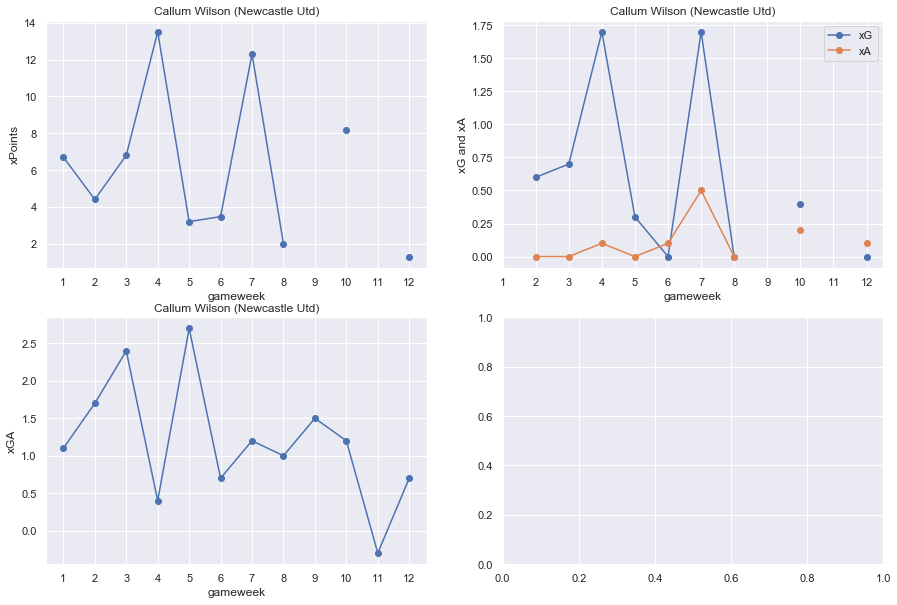

In [21]:
# find player index
name_string = 'Wilson'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
ix = 506

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [16]:
# find player index
df[df['web_name'].str.contains('Pulisi')]

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,creativity,creativity_rank,creativity_rank_type,direct_freekicks_order,direct_freekicks_text,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,goals_conceded,goals_scored,ict_index,ict_index_rank,ict_index_rank_type,in_dreamteam,influence,influence_rank,influence_rank_type,minutes,news,news_added,now_cost,own_goals,penalties_missed,penalties_order,penalties_saved,penalties_text,photo,points_per_game,red_cards,saves,second_name,selected_by_percent,special,...,xG_week6,goals_week6,xGA_week6,cleansheet_week6,xA_week6,assists_week6,xPoints week 7,xG_week7,goals_week7,xGA_week7,cleansheet_week7,xA_week7,assists_week7,xPoints week 8,xG_week8,goals_week8,xGA_week8,cleansheet_week8,xA_week8,assists_week8,xPoints week 9,xG_week9,goals_week9,xGA_week9,cleansheet_week9,xA_week9,assists_week9,xPoints week 10,xG_week10,goals_week10,xGA_week10,cleansheet_week10,xA_week10,assists_week10,xPoints week 11,xG_week11,goals_week11,xGA_week11,cleansheet_week11,xA_week11,assists_week11,form 10,form 5,next1_xP,next5_xP,next10_xP,value,valuePoints metric,xG+xA,xG+xA per game
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
119,0,0,47,100.0,100.0,2,176413,NaN,NaN,0,0,-3,3,17.8,294,156,NaN,NaN,0,3,2.7,2.7,0,Christian,2.2,2,1,24.6,192,91,False,67.0,261,111,249,NaN,2020-12-12T22:00:13.289919Z,82,0,0,NaN,0,NaN,176413.jpg,3.0,0,0,Pulisic,2.4,False,...,0.1,0.0,0.7,1.0,0.0,0.0,NaN,NaN,NaN,0.4,0.0,NaN,NaN,NaN,NaN,NaN,0.6,0.0,NaN,NaN,NaN,NaN,NaN,0.7,0.0,NaN,NaN,1.0,0.0,0.0,0.1,0.0,0.0,0.0,5.772532,0.7,1.0,1.3,1.0,0.0,0.0,2.735984,3.386266,2.829452,2.845678,2.88166,0.355588,1.018248,1.0,0.2


In [17]:
my_starting11 = [363,232,77,277,254,302,37,141,506,202,388]
my_subs = [35,474,200,146]

In [22]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
363,McCarthy,Southampton,46,11.904762,4.2,3.656509,4.329611,4.457734,3.769340,3.500609,1.704856
232,Chilwell,Chelsea,62,8.955224,6.7,4.935969,5.496238,5.655915,5.102004,4.849839,1.982333
77,Lamptey,Brighton,48,10.000000,2.9,3.371678,3.095759,3.322330,3.519749,3.643708,1.538953
277,Cancelo,Manchester City,55,6.981132,5.3,4.861651,4.379792,5.409459,6.189232,4.947580,2.073015
254,Salah,Liverpool,123,11.046512,8.6,7.286663,7.756663,7.078958,6.867700,7.428801,2.077668
302,Fernandes,Manchester Utd,109,11.066667,7.5,6.678367,8.287832,7.451353,7.132166,6.989544,2.022819
37,Grealish,Aston Villa,78,10.000000,7.3,5.715123,4.437135,6.166677,6.279950,5.835826,2.046342
141,Zaha,Crystal Palace,75,10.000000,7.4,6.093346,5.986058,6.031976,5.959082,6.203494,2.224975
506,Wilson,Newcastle Utd,66,10.000000,6.8,5.939543,3.830040,6.344933,6.740442,6.183595,2.311964



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
35,Nyland,Aston Villa,40,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
474,Neto,Wolves,57,11.956522,4.6,3.997583,4.334989,4.194831,3.738469,3.840487,1.674403
200,Dallas,Leeds United,46,12.121212,3.3,2.674144,3.060076,3.315217,3.064902,2.901694,1.246826
146,Mitchell,Crystal Palace,40,6.000000,2.5,2.659625,NaN,1.946242,2.437093,2.453433,1.329812


## Save data

In [19]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)